# DSSC detector geometry

As of version 0.5, `karabo_data` has geometry code for the DSSC detector.
This doesn't currently account for the hexagonal pixels of DSSC, but it's
good enough for a preview of detector images.

In [1]:
%matplotlib inline
from karabo_data.geometry2 import DSSC_Geometry

In [2]:
# Made up numbers!
quad_pos = [
    (-130, 5),
    (-130, -125),
    (5, -125),
    (5, 5),
]
path = 'dssc_geo_june19.h5'

g = DSSC_Geometry.from_h5_file_and_quad_positions(path, quad_pos)

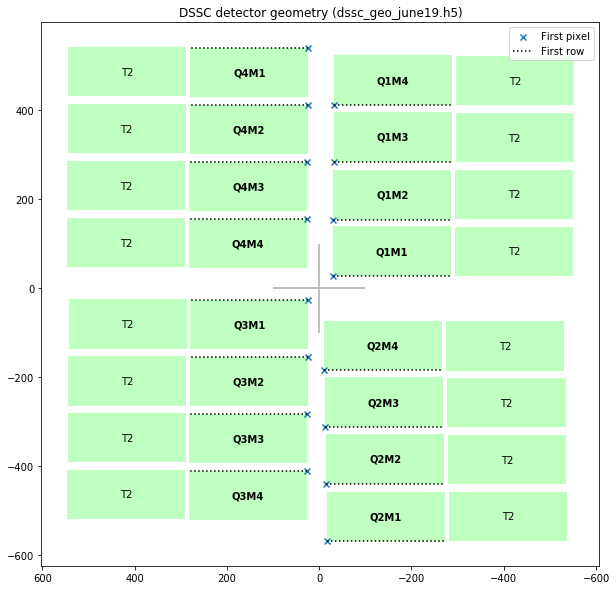

In [3]:
g.inspect()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
g.expected_data_shape

(16, 128, 512)

We'll use some empty data to demonstate assembling an image.

In [6]:
a = np.zeros(g.expected_data_shape)

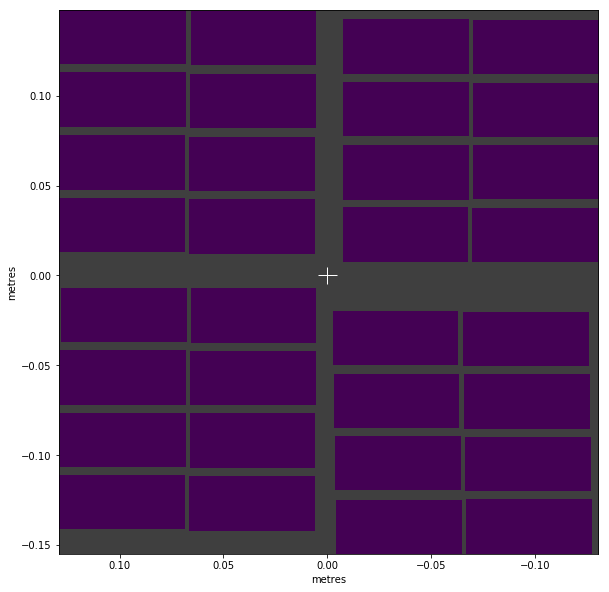

In [7]:
g.plot_data_fast(a, axis_units='m');

Finally, let's examine the shape of some pixels in the corner of Q1M1, using a pyFAI distortion array:

In [8]:
dist = g.to_distortion_array()

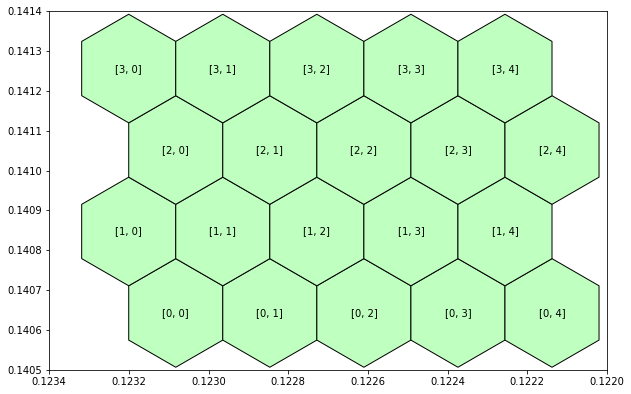

In [9]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig, ax = plt.subplots(figsize=(10, 10))

hexes = []
for ss_pxl in range(4):
    for fs_pxl in range(5):
        corners = dist[ss_pxl, fs_pxl]
        corners = corners[:, 1:][:, ::-1]  # Drop z, flip x & y
        hexes.append(Polygon(corners))
        cx, cy = corners.mean(axis=0)
        ax.text(cx, cy, '[{}, {}]'.format(ss_pxl, fs_pxl),
                verticalalignment='center', horizontalalignment='center')

pc = PatchCollection(hexes, facecolor=(0.75, 1.0, 0.75), edgecolor='k')
ax.add_collection(pc)
ax.set_xlim(0.1234, 0.122)  # To match the convention elsewhere, draw x right-to-left
ax.set_ylim(0.1405, 0.1414)
ax.set_aspect(1)